## 1. UNDERSTANDING THE GIVEN TASK
#### Task Given by instructor Krish Naik
* Solve in ipynb:
1. Import the dataset.
https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#
2. Do proper EDA(analysis) of your dataset and create a report
3. Then perform necessary preprocessing steps

## 2. DATA COLLECTION AND UNDERSTANDING

* I used a dataset on **Algerian Forest Fires** from UCI. The dataset contains a culmination of forest fire observations and data in two regions of Algeria: the Bejaia region and the Sidi Bel-Abbes region. The timeline of this dataset is from **June 2012 to September 2012**. In this project, we focused on whether certain weather features could predict forest fires in these regions using few Classification algorithms.


* As per the Task given i choose regression problem to predict fire weather index

## 3. DATA EXPLORATION

* In this step, we will apply Exploratory Data Analysis (EDA) to extract insights from the data set to know which features have contributed more in predicting Forest fire by performing Data Analysis using Pandas and Data visualization using Matplotlib & Seaborn. It is always a good practice to understand the data first and try to gather as many insights from it.


Below are tasks to be performed in EDA:

**1. Importing Libraries**

**2. Data Cleaning for EDA Report** 

**3. Exploratory Data Analysis (EDA) on all Features**

## Feature Information : 

- Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

#### Weather data observations :
- Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
- RH : Relative Humidity in %: 21 to 90
- Ws :Wind speed in km/h: 6 to 29
- Rain: total day in mm: 0 to 16.8

#### FWI Components :
- Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
- Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
- Drought Code (DC) index from the FWI system: 7 to 220.4
- Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
- Buildup Index (BUI) index from the FWI system: 1.1 to 68
- Fire Weather Index (FWI) Index: 0 to 31.1
- Classes: two classes, namely not fire and fire.

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv("../load_data/csv/cleaned_Algerian_forest_fires_dataset.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
df.drop(["day","month","year"],axis=1,inplace=True)

In [6]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [7]:
df["Classes"].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [8]:
df["Classes"] = np.where(df["Classes"].str.contains("not fire"),0,1)

In [9]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [10]:
df["Classes"].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [11]:
X = df.drop("FWI",axis=1)
y = df["FWI"]

In [12]:
# Train test split the data
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [14]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [15]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

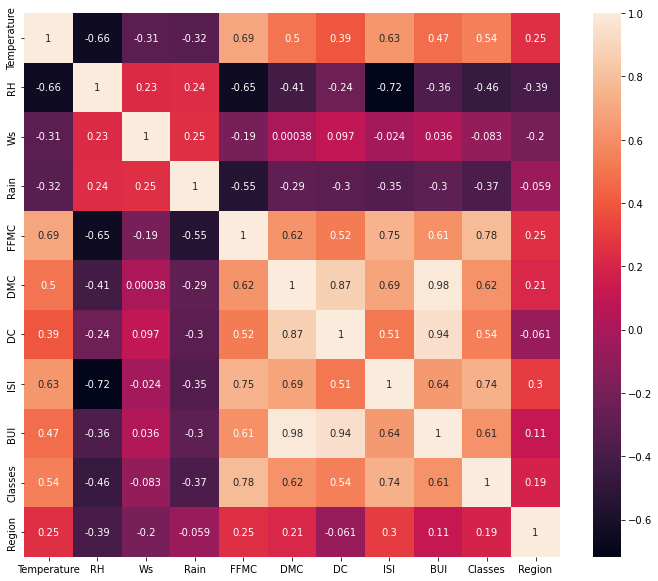

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(),annot=True)

In [17]:
def find_corr(data,threshold):
    corr_matrix = data.corr()
    corr_col = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                corr_col.add(corr_matrix.columns[i])
    return corr_col

In [18]:
# Threshold-Domain Expertise
corr_features = find_corr(X_train,0.85)
corr_features

{'BUI', 'DC'}

In [19]:
# Drop feature which has more than 0.85 correlation:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

In [20]:
# Feature Scaling / Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

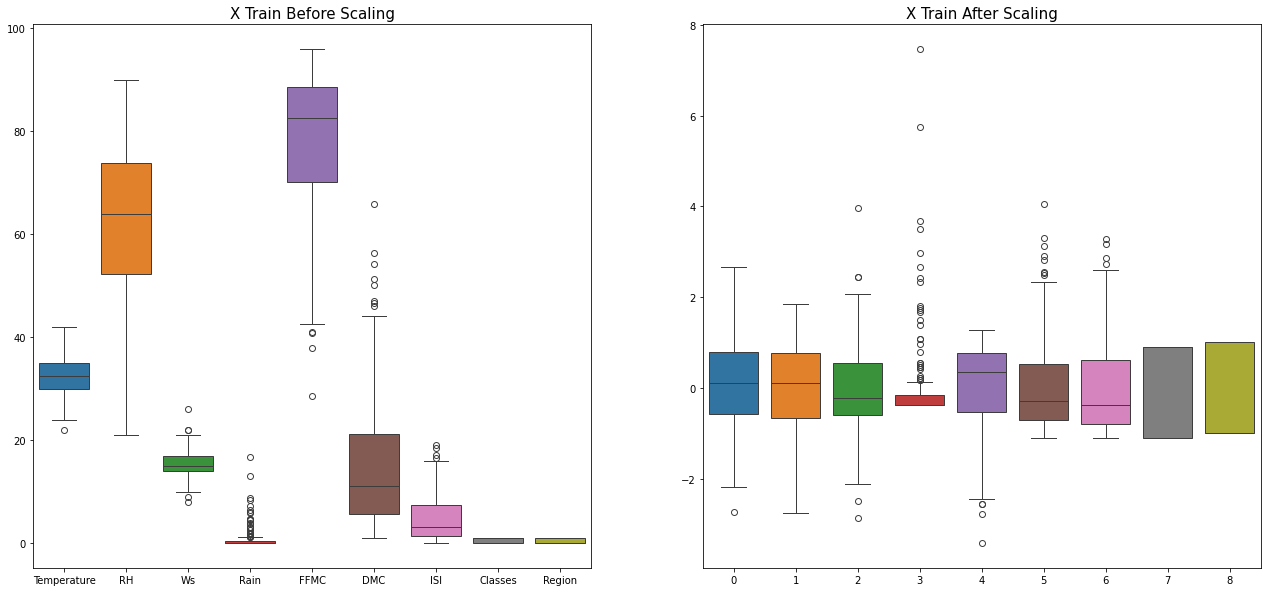

In [21]:
# plt.figure()

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(22,10))

sns.boxplot(X_train,ax=ax1)
ax1.set_title("X Train Before Scaling",fontdict={"fontsize":15})
sns.boxplot(X_train_scaled,ax=ax2)
ax2.set_title("X Train After Scaling",fontdict={"fontsize":15})

# plt.tight_layout()
plt.show()

### Linear Regression Model

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

Mean Square Error : 0.674276687379158
R2 Score : 0.9847657384266951


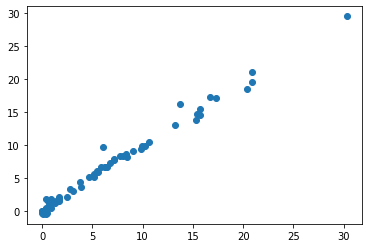

In [23]:
lnreg = LinearRegression()
lnreg.fit(X_train_scaled,y_train)
y_pred = lnreg.predict(X_test_scaled)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("Mean Square Error :",mse)
print("R2 Score :",score)

plt.scatter(y_test,y_pred)
plt.show()

### Lasso Regression Model

In [24]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

Mean Square Error : 2.2483458918974772
R2 Score : 0.9492020263112388


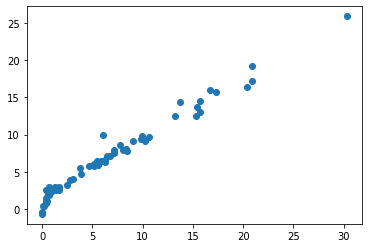

In [25]:
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)

mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("Mean Square Error :",mse)
print("R2 Score :",score)

plt.scatter(y_test,y_pred)
plt.show()

### Lasso Cross Validation

In [26]:
from sklearn.linear_model import LassoCV

Mean Absolute Error : 0.619970115826343
R2 Score : 0.9820946715928275


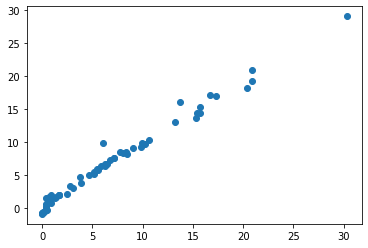

In [27]:
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)
y_pred = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("Mean Absolute Error :",mae)
print("R2 Score :",score)

plt.scatter(y_test,y_pred)
plt.show()

### Ridge Regression Model

In [28]:
from sklearn.linear_model import Ridge

Mean Absolute Error : 0.5642305340105715
R2 Score : 0.9842993364555512


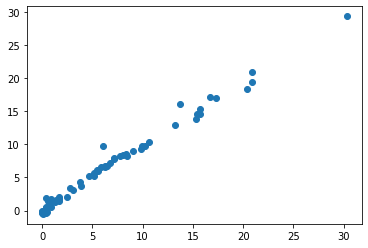

In [30]:
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("Mean Absolute Error :",mae)
print("R2 Score :",score)

plt.scatter(y_test,y_pred)
plt.show()

### Ridge Cross Validation Model

In [32]:
from sklearn.linear_model import RidgeCV

Mean Absolute Error : 0.5642305340105715
R2 Score : 0.9842993364555512


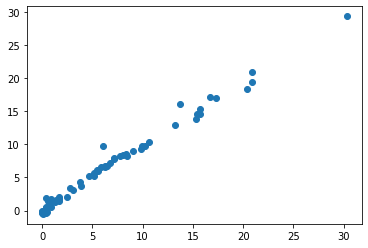

In [33]:
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("Mean Absolute Error :",mae)
print("R2 Score :",score)

plt.scatter(y_test,y_pred)
plt.show()

In [34]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

### Elasticnet Regression Model

In [35]:
from sklearn.linear_model import ElasticNet

Mean Absolute Error : 1.8822353634896005
R2 Score : 0.8753460589519703


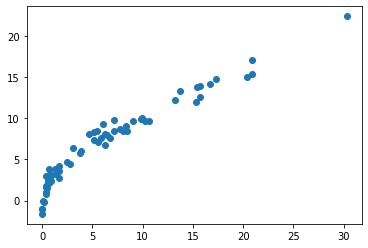

In [36]:
enet = ElasticNet()
enet.fit(X_train_scaled,y_train)
y_pred = enet.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("Mean Absolute Error :",mae)
print("R2 Score :",score)

plt.scatter(y_test,y_pred)
plt.show()

### ElasticNet Cross Validation Model

In [37]:
from sklearn.linear_model import ElasticNetCV

Mean Absolute Error : 0.6575946731430898
R2 Score : 0.9814217587854941


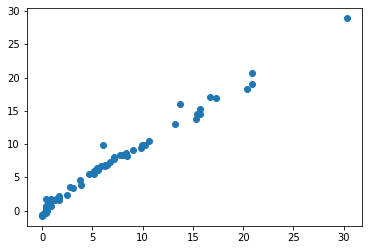

In [38]:
enetcv = ElasticNetCV()
enetcv.fit(X_train_scaled,y_train)
y_pred = enetcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("Mean Absolute Error :",mae)
print("R2 Score :",score)

plt.scatter(y_test,y_pred)
plt.show()

### Creating Pickle File

In [44]:
scaler

StandardScaler()

In [46]:
ridge

Ridge()

In [47]:
import pickle
pickle.dump(scaler,open("scaler.pkl","wb"))
pickle.dump(enetcv,open("ridge.pkl","wb"))

In [48]:
scaler = pickle.load(open("scaler.pkl","rb"))
scaled_data = scaler.transform([[11,80,20,0.3,66.7,5.5,4.3,0,1]])

get_model = pickle.load(open("ridge.pkl","rb"))
get_model.predict(scaled_data)

array([3.43970038])